In [1]:
attributes_list = ['upperBodyLogo', 'lowerBodyThinStripes', 'upperBodyThinStripes', 'upperBodyThickStripes', 'accessoryHeadphone', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'carryingFolder', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'carryingLuggageCase', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'lowerBodyCapri', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'lowerBodyFormal', 'upperBodyFormal', 'lowerBodyPlaid', 'personalMale', 'upperBodyPlaid']
print(attributes_list)

['upperBodyLogo', 'lowerBodyThinStripes', 'upperBodyThinStripes', 'upperBodyThickStripes', 'accessoryHeadphone', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'carryingFolder', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'carryingLuggageCase', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'personalLess15', 'personalLess30', 'personalLess45', 'personal

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import cv2
from cv2 import *
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy.misc import toimage
import sys
sys.path.append("..")
from src.network.hiarBayesGoogLenet_gap import hiarBayesGoogLeNet
import keras.backend as K

low_level = [27, 32, 50, 56]#, 61, 62, 63, 64
mid_level = [0, 6, 7, 8, 9, 11, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60]
high_level = [1, 2, 3, 4, 5, 10, 14, 15, 16, 18, 19, 31, 34, 40]

head_level = [0,8,20,21,25,28,36,37,44,54]
upperbody_level = [7,15,17,19,23,27,30,39,40,46,50,51,55,56,58,59,60]
lowerbody_level = [6,10,11,12,13,14,18,22,24,29,31,32,33,35,38,41,45,47,52,53,57]
foot_level = [9,26,42,43,48,49]
global_level = [1,2,3,4,5,16,34]

image_width = 75
image_height = 160
#model_h = hiarGoogLeNet.build(image_height, image_width, 3, [len(low_level), len(mid_level), len(high_level)])
#model_h.load_weights("/home/anhaoran/codes/pedestrian_attibutes_wpal/models/imagenet_models/hiarGoogLeNet_RAP/binary51_epoch50_valloss0.21.hdf5")
#model_g = GoogLeNet.build(image_height, image_width, 3, 51)
#model_g.load_weights("../models/imagenet_models/GoogLeNet_RAP/binary51_epoch50_valloss0.54.hdf5")
model_gh = hiarBayesGoogLeNet.build(image_height, image_width, 3, [len(low_level), len(mid_level), len(high_level)])
model_gh.load_weights("../models/imagenet_models/hiarBayesGoogLeNet_PETA/binary61_gap&dense_final500iter_model.h5")
model_gh.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 75, 3)   0                                            
__________________________________________________________________________________________________
conv1_7x7_s2 (Conv2D)           (None, 80, 38, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_7x7_s2_bn (BatchNormaliza (None, 80, 38, 64)   256         conv1_7x7_s2[0][0]               
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 40, 19, 64)   0           conv1_7x7_s2_bn[0][0]            
__________________________________________________________________________________________________
conv2_3x3 

(1, 160, 75, 3)
[ 0 ] upperBodyLogo :  False
[ 1 ] lowerBodyThinStripes :  False
[ 2 ] upperBodyThinStripes :  False
[ 3 ] upperBodyThickStripes :  False
[ 4 ] accessoryHeadphone :  False
[ 5 ] carryingBabyBuggy :  False
[ 6 ] carryingBackpack :  False
[ 7 ] hairBald :  False
[ 8 ] footwearBoots :  False
[ 9 ] carryingOther :  False
[ 10 ] carryingShoppingTro :  False
[ 11 ] carryingUmbrella :  False
[ 12 ] carryingFolder :  False
[ 13 ] accessoryHairBand :  False
[ 14 ] accessoryHat :  False
[ 15 ] lowerBodyHotPants :  False
[ 16 ] upperBodyJacket :  False
[ 17 ] lowerBodyJeans :  False
[ 18 ] accessoryKerchief :  False
[ 19 ] footwearLeatherShoes :  False
[ 20 ] hairLong :  False
[ 21 ] lowerBodyLongSkirt :  False
[ 22 ] upperBodyLongSleeve :  True
[ 23 ] carryingLuggageCase :  False
[ 24 ] carryingMessengerBag :  False
[ 25 ] accessoryMuffler :  False
[ 26 ] accessoryNothing :  True
[ 27 ] carryingNothing :  False
[ 28 ] upperBodyNoSleeve :  False
[ 29 ] carryingPlasticBags :  False

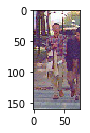

In [3]:
def load_original(img_path, img_height, img_width):
    # 把原始图片压缩为 299*299大小
    img = image.load_img(img_path, target_size=(image_height, image_width, 3))
    plt.figure(0)
    plt.subplot(211)
    plt.imshow(img)
    return img

img_path = '/home/anhaoran/data/pedestrian_attributes_PETA/PETA/MIT/archive/00044_male_fore.jpg'
img = load_original(img_path, image_height, image_width)
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
print(img_arr.shape)

predictions = model_gh.predict(img_arr)
for i in range(len(predictions[0])):
    print("[", i, "]", attributes_list[i], ": ", predictions[0, i]>=0.5)

In [4]:
layer_gap_low = model_gh.get_layer('conv1_e')
layer_gap_mid = model_gh.get_layer('conv2_e')
layer_gap_hig = model_gh.get_layer('conv3_e')

# Grad_CAM

In [48]:
class_idx = 26
if class_idx >= 0 and class_idx <= 3:
    last_conv_layer = layer_gap_low
elif class_idx >= 4 and class_idx <= 46:
    last_conv_layer = layer_gap_mid
elif class_idx >= 47 and class_idx <= 60:
    last_conv_layer = layer_gap_hig
class_output = model_gh.output[:, class_idx]
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model_gh.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_arr])
for i in range(len(pooled_grads_value)):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

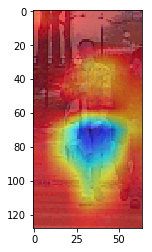

In [49]:
from PIL import Image

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#plt.imshow(heatmap)
#plt.show()
#plt.imshow(Image.fromarray(np.uint8(img_arr[0])))
#plt.show()
img = cv2.imread(img_path)
superimposed_img = cv2.addWeighted(img, 0.4, heatmap, 0.6, 0)
plt.imshow(superimposed_img)
plt.show()